<img src="http://drive.google.com/uc?export=view&id=1JzM1Jig5KAOCvU4tIf2t66B3gd1uy1rG" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# <font color='blue'> Table Of Contents </font> 

<font color='blue'>
    
- ## Node-Red - Server to Devices
- ## Practical Exercises

</font>

# <font color='blue'> Node-Red - Server to Devices </font> 

In the previous lab, we looked at how to use NodeRED to ingest data from various devices using MQTT, do some basic bifurcation and store the data. In this lab, we will look at 'server to devices' flow using a basic medicine timing alert flow.

Consider a healthcare use-case where all the data related to patient medication and scheduling related to that is available in the database (MongoDB). 

We need to automate the task where each patient's medication should be published and informed to the respective staff or patient an hour before the time. The device at the staff/patient's end can be a bedside monitor, their mobile phone (app notifications or SMSes), watch wearable or equivalent 

We need to use MQTT services so that each device associated with patient's health must be subscribed to the specific topic, mapped to their device, to maintain the effiency.

Let us discuss the required nodes and the approach to solve this problem. 

## <font color='blue'> Approach </font> 

To work on the above mentioned problem statement we need to utilize the mongodb database along with the MQTT broker. 

Lets create the database which has some details related to the medicines prescribed to the patient along with the schedule to administer those medicines. The record should also have information mapping to the device/patient it is setup for.

Once inserted the DB should have datapoints as shown below. See 'MongoDB data' at the end of this lab to see an example dataset. You can insert more datapoints to incoroprate a large number of devices. For now, we will have 4 devices/patients in the database.

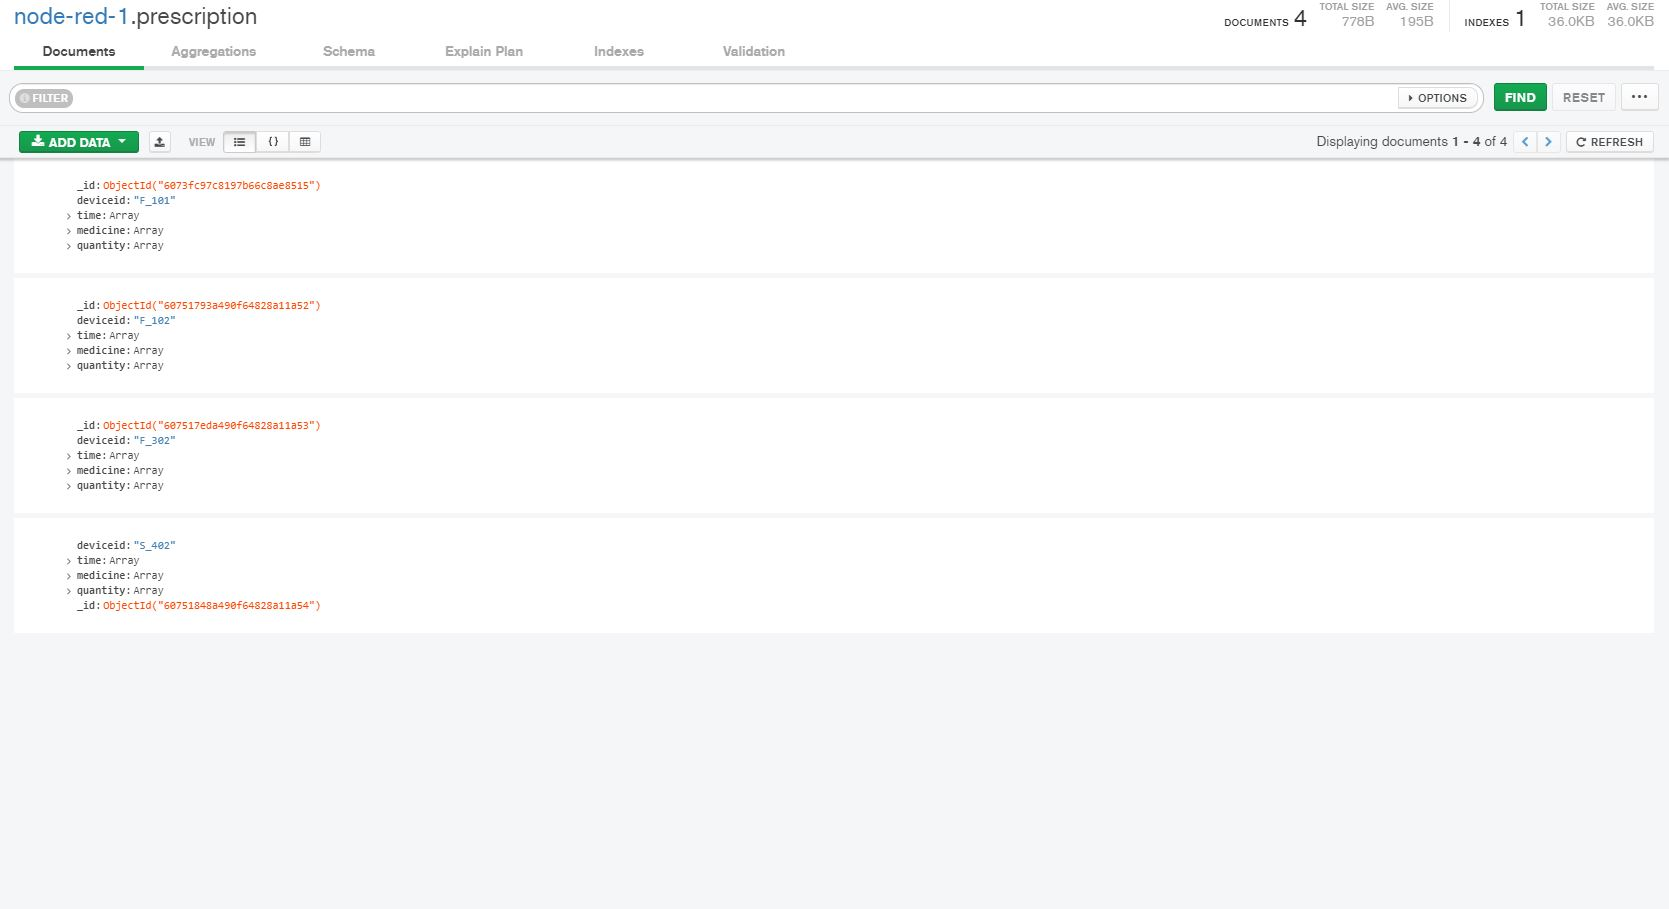


1. Once we have the data available in the DB, we need to fetch it using mongo node in node-red.
2. We'll trigger this periodically and check for upcoming medicine timings.
3. After getting the data in node-red, we will employ a function which will publish the data on indvidual topics. To publish on a specific device, we will use the deviceid available in the DB and dynamically set the topic accordingly.. 
4. Once data is published on MQTT broker, we will employ different MQTT subscriber nodes to view the published data on the relevant topics. **This is shown for visualization. This would actually be done by the devices themselves which are listening to the MQTT broker on a specific topic mapped to their deviceid.** 
4. The javascript function in node-red is going through each record available as payload. Each record has details of prescribed medicines, timings, quantity and dosage. In the function, we are setting up the topic and creating a dynamic message with relevant details.
5. The newly created message will be published for subscribed devices available in node-red. 

Please look at the overall image to understand the representation: 

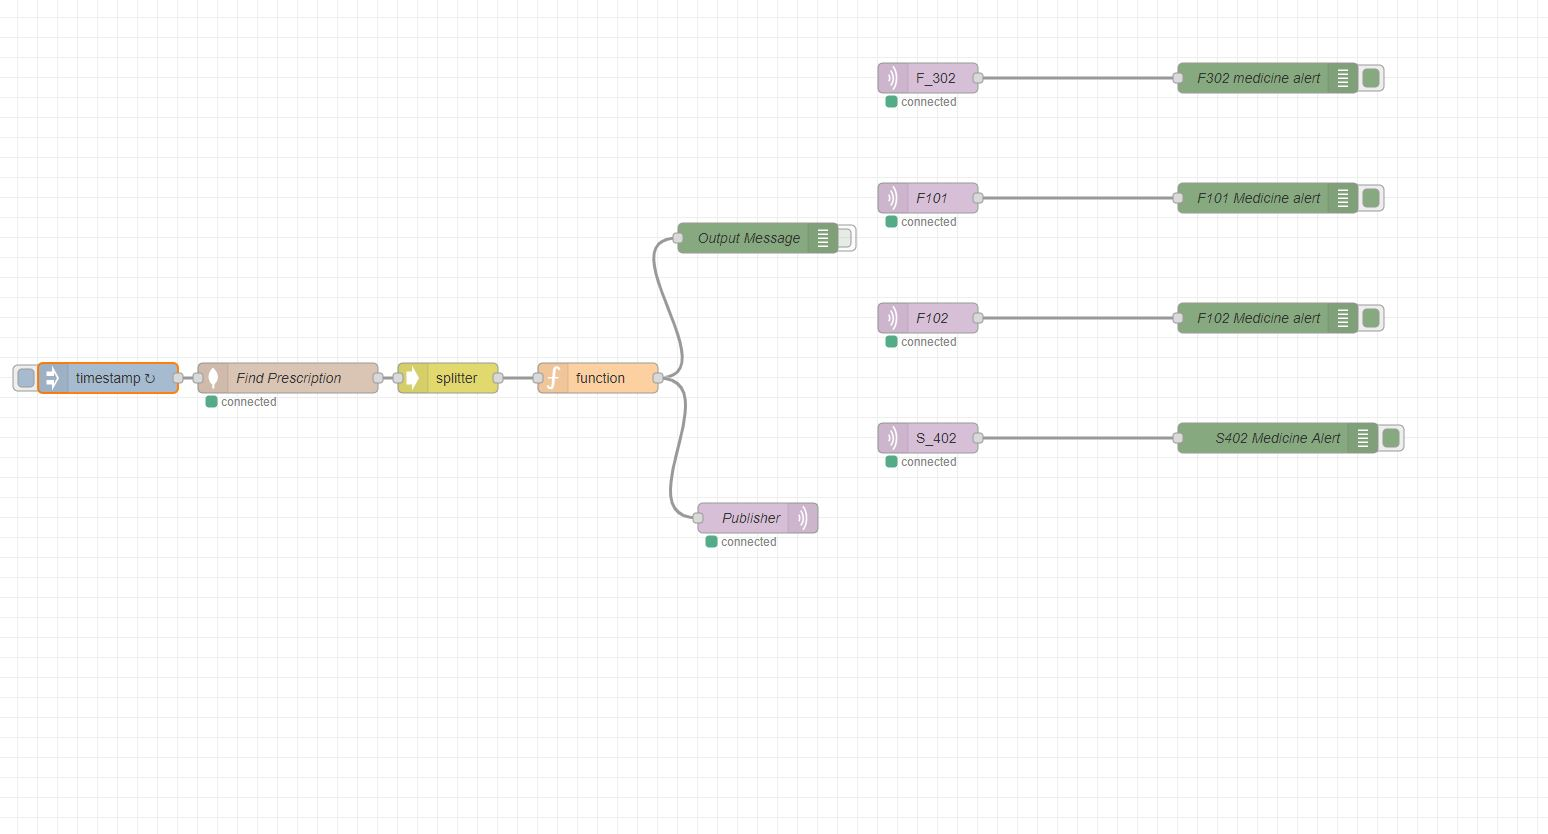



As it is evident from the above image, we are using the following nodes to execute the problem statement: 

1. mqtt out (1 Publisher to publish on indiidual)
2. mqtt in (= Number of devices in the DB)
3. mongodb in (To get the data fro db)
4. debugger to print the message 
5. inject node (To trigger the period inection from database)
6. splitter node (to split the output as individual JSON object)
7. function (to configure the message and topic for each device)

1. We have covered the configuration of MQTT and Mongodb in the M02W03 Notebook. If the configuration is done in the last lab, there is no need todo the server setup.  
2. Make sure that the mongo server is connected to the newly created DB and collection which has the relevant data. 
3. Install the splitter library using manage pallete. Go to the manage palette section as mentioned below: 

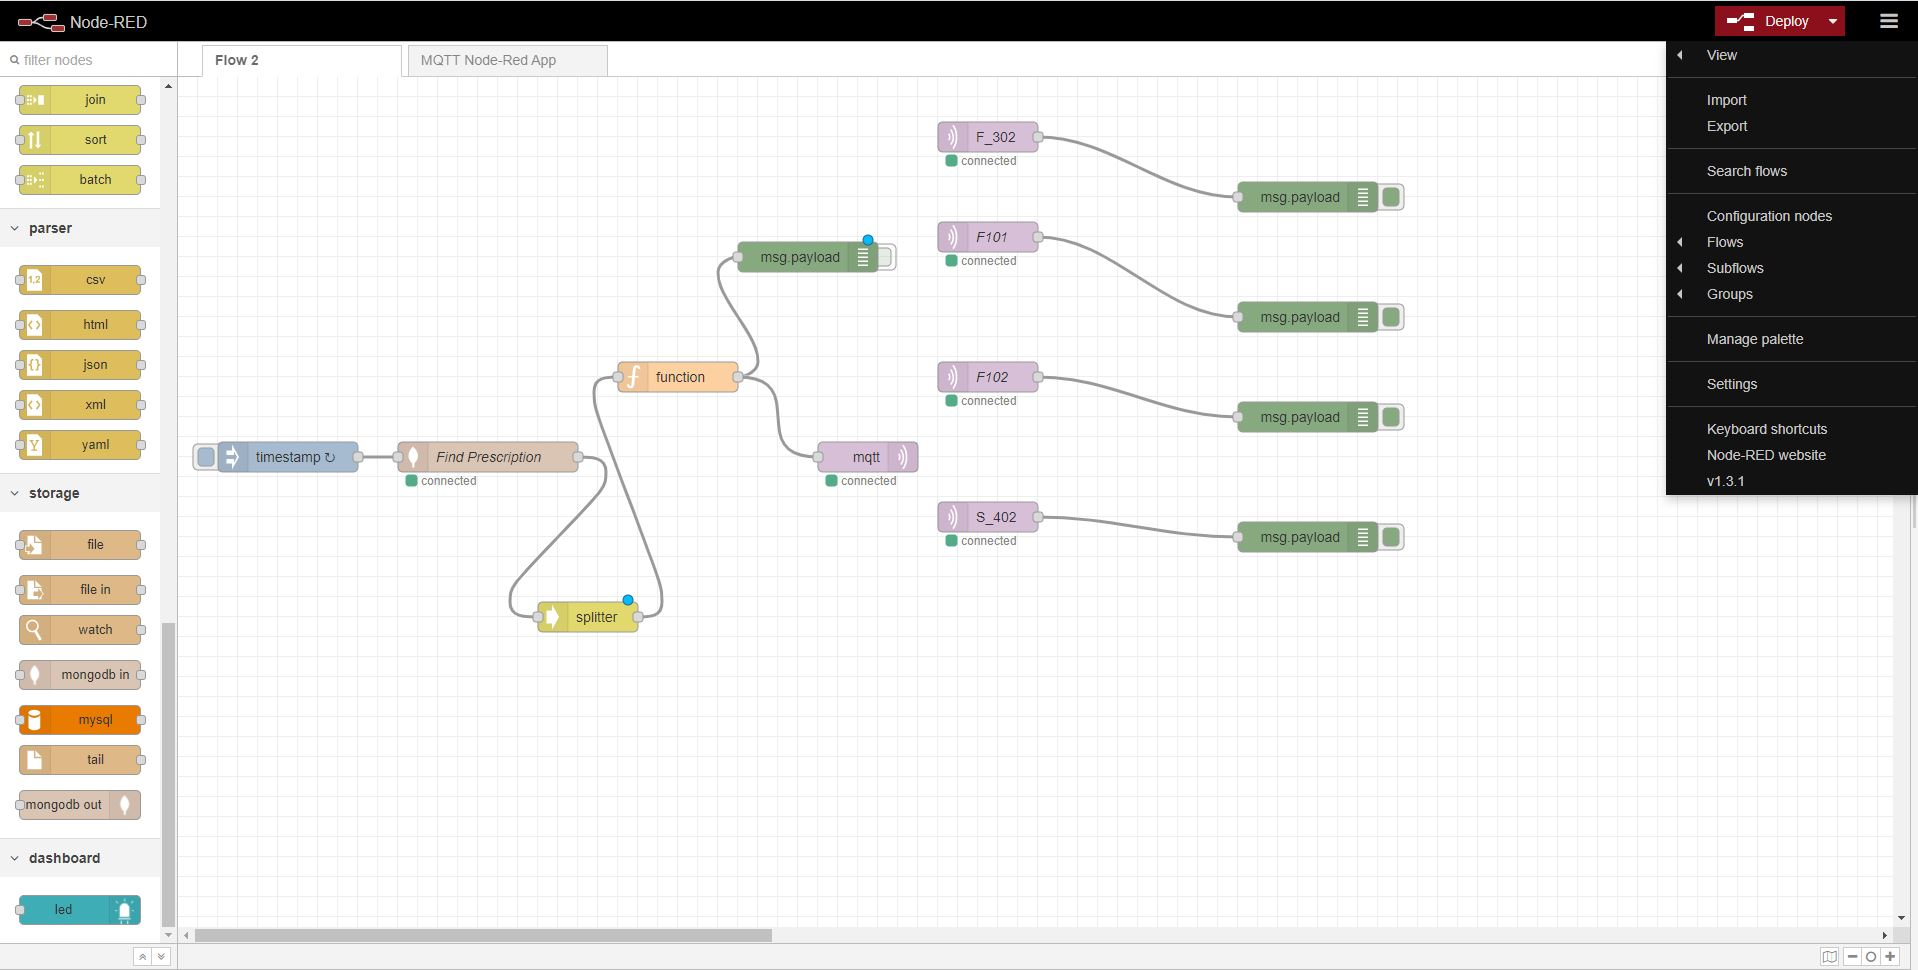

4. Click on mangae palette and choose install tab and search for `node-red-contrib-splitter`. Install the available library.

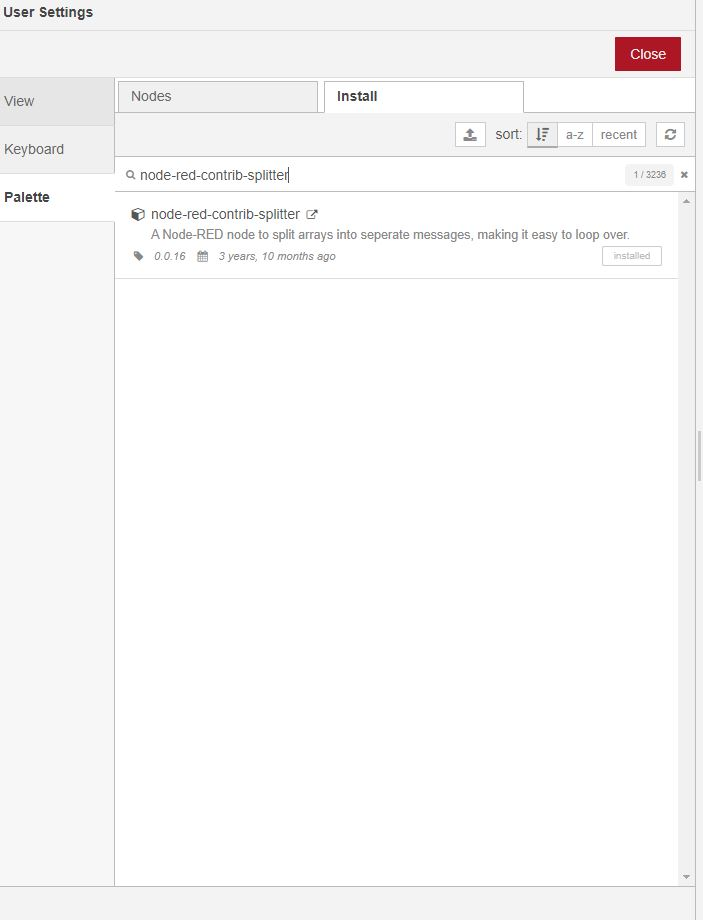

5. Configure each subscriber MQTT node by providing the deviceid as topic_name because in fucntion we are forwarding the topic as device id.
6. Connect the nodes to make sure that we are getting the data in debug nodes.
7. Run the MQTT broker on your machine. 
8. Run the mongodb server on your machine and create the data in the appropriate collection. 

Lets look at the JS code available in the function node:

In [ ]:
# JS code to configure each message to a topic and the alert needs to be forwarded to the each subscriber. 

msg.payload = msg.payload;
msg.topic = msg.payload.deviceid;

var schedule = msg.payload.time;
var medicine = msg.payload.medicine;
var mediquantity = msg.payload.quantity;

var message = " "

for (medicineiter=0; medicineiter<medicine.length; medicineiter++){
    message = message + medicine[medicineiter];
    message = message + " : " + mediquantity[medicineiter] + " mg, ";
}

for (scheduleiter=0; scheduleiter<schedule.length; scheduleiter++){
    var today = new Date();
    var time = Number(today.getHours());
    var prescribed_time = Number(schedule[scheduleiter].split(":")[0])
    if (time+1 == prescribed_time){
        var leftTime = 60 - Number(today.getMinutes());
        return {payload: `Please take the medicine, ${leftTime} minutes remaining. Medicines are ${message}`, topic: msg.topic};
    }
}



## <font color='blue'> Code-Walkthorugh </font> 

We are getting message in the form of JSON object. As it is clear from the DB that medicine, time and quantity is coming as an array in the JSON object. 

We are creating dfferent variables for schedule, medicine and quantity. Then we are creatng an empty string to save the quantity and medicne together. This we are doig in the first for loop.

schedule varibale is used to get all the prescribed time for that particular patient. In the second for loop we are calculating the current hour of the day along with prescribed hour. 

We are using conditional operator to identify the 1 hour window to generate the alert. Inside the conditonal block we are calculating the remaining time to give the medicine. 

At the end we are confguring everything in the payload along wth the topic name.

Return command will ultimately push the data on the mentioned topic. In case of valid data points, debugger will show the relevant message. 

Please find the image below: 

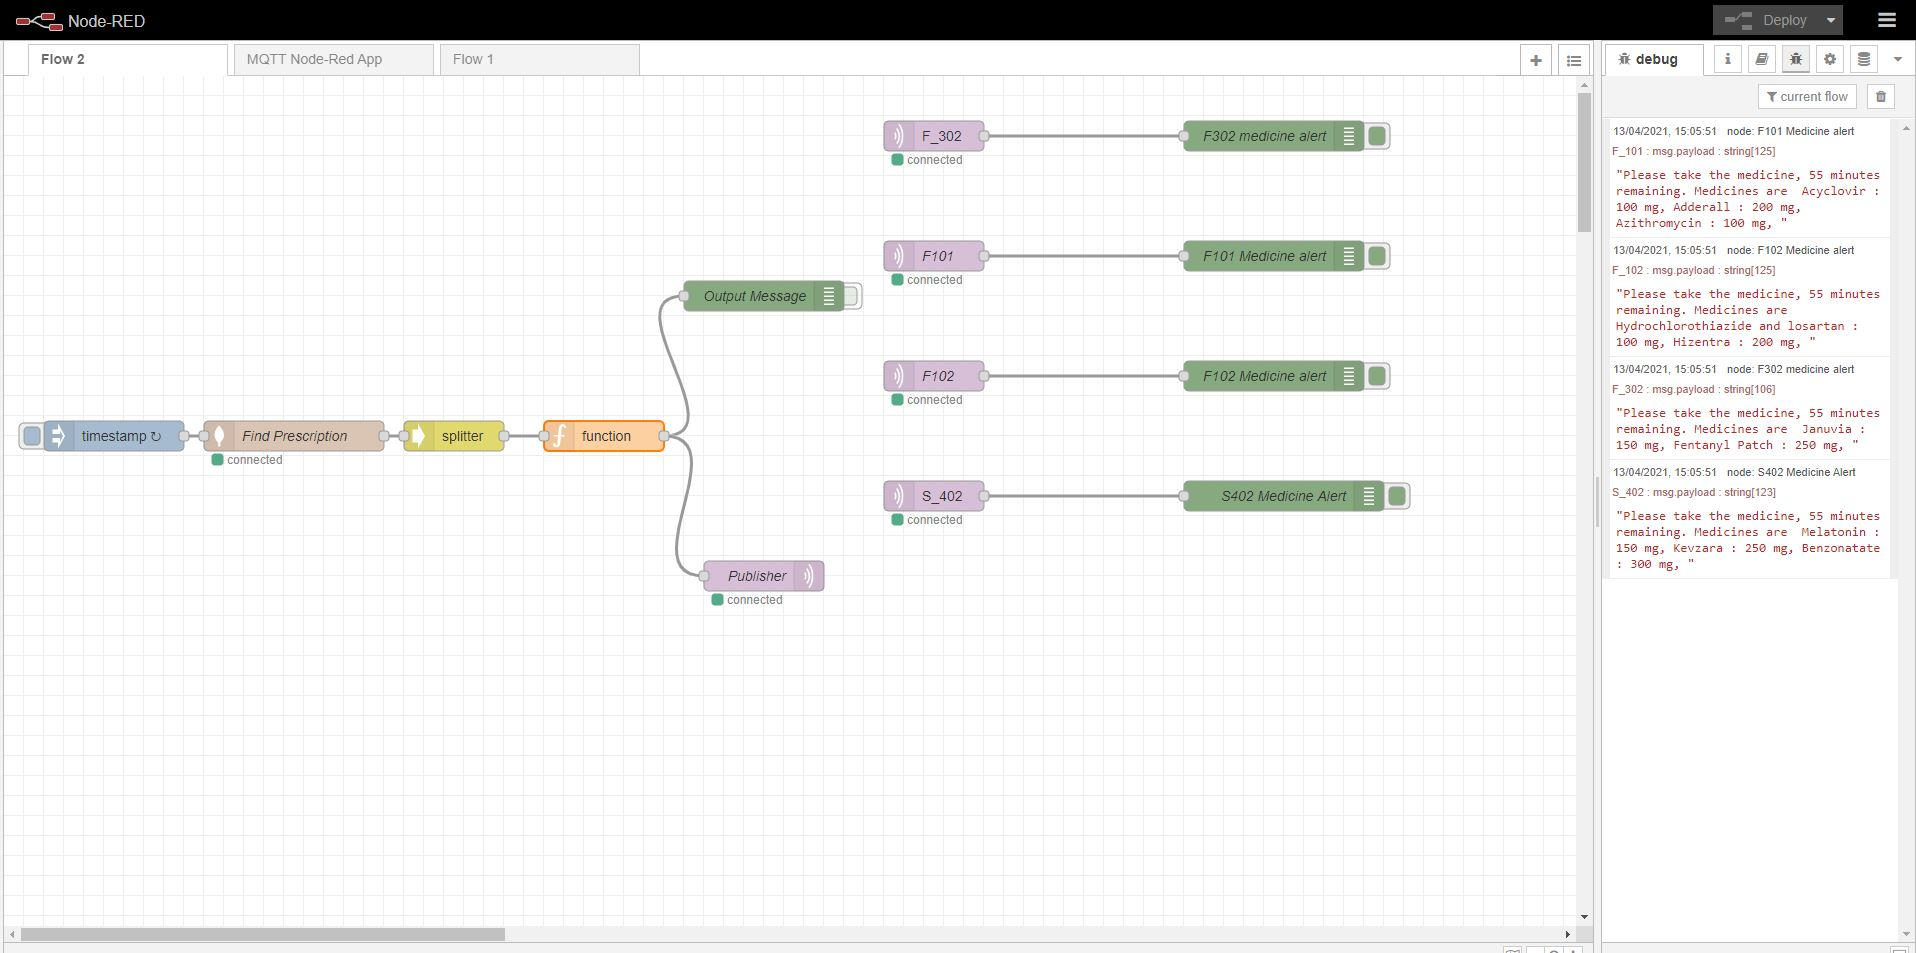




## <font color='blue'> MongoDB data </font> 

In [ ]:
[{
  "_id": {
    "$oid": "6073fc97c8197b66c8ae8515"
  },
  "deviceid": "F_101",
  "time": [
    "9:00",
    "15:00",
    "21:00"
  ],
  "medicine": [
    "Acyclovir",
    "Adderall",
    "Azithromycin"
  ],
  "quantity": [
    "100",
    "200",
    "100"
  ]
},{
  "_id": {
    "$oid": "60751793a490f64828a11a52"
  },
  "deviceid": "F_102",
  "time": [
    "7:00",
    "19:00"
  ],
  "medicine": [
    "Hydrochlorothiazide and losartan",
    "Hizentra"
  ],
  "quantity": [
    "100",
    "200"
  ]
},{
  "_id": {
    "$oid": "607517eda490f64828a11a53"
  },
  "deviceid": "F_302",
  "time": [
    "9:00",
    "13:00",
    "17:00"
  ],
  "medicine": [
    "Januvia",
    "Fentanyl Patch"
  ],
  "quantity": [
    "150",
    "250"
  ]
},{
  "_id": {
    "$oid": "60751848a490f64828a11a54"
  },
  "deviceid": "S_402",
  "time": [
    "9:00",
    "14:00",
    "19:00"
  ],
  "medicine": [
    "Melatonin",
    "Kevzara",
    "Benzonatate"
  ],
  "quantity": [
    "150",
    "250",
    "300"
  ]
}]

## <font color='blue'> Node-red Example source code </font> 

In [ ]:
[
    {
        "id": "7ece654.cd14a9c",
        "type": "tab",
        "label": "Flow 2",
        "disabled": false,
        "info": ""
    },
    {
        "id": "9dd86a44.e1ced8",
        "type": "mongodb in",
        "z": "7ece654.cd14a9c",
        "mongodb": "28887bfc.5db4e4",
        "name": "Find Prescription",
        "collection": "prescription",
        "operation": "find",
        "x": 290,
        "y": 360,
        "wires": [
            [
                "3d61374d.8374b8"
            ]
        ]
    },
    {
        "id": "bb2e388a.8c3118",
        "type": "inject",
        "z": "7ece654.cd14a9c",
        "name": "",
        "props": [
            {
                "p": "payload"
            }
        ],
        "repeat": "3600",
        "crontab": "",
        "once": false,
        "onceDelay": 0.1,
        "topic": "",
        "payload": "",
        "payloadType": "date",
        "x": 110,
        "y": 360,
        "wires": [
            [
                "9dd86a44.e1ced8"
            ]
        ]
    },
    {
        "id": "5b7a1c61.109df4",
        "type": "mqtt out",
        "z": "7ece654.cd14a9c",
        "name": "Publisher",
        "topic": "",
        "qos": "0",
        "retain": "",
        "respTopic": "",
        "contentType": "",
        "userProps": "",
        "correl": "",
        "expiry": "",
        "broker": "51e7336f.fc373c",
        "x": 760,
        "y": 500,
        "wires": []
    },
    {
        "id": "c0a3d99f.caa378",
        "type": "mqtt in",
        "z": "7ece654.cd14a9c",
        "name": "F101",
        "topic": "F_101",
        "qos": "0",
        "datatype": "auto",
        "broker": "51e7336f.fc373c",
        "nl": false,
        "rap": false,
        "x": 930,
        "y": 180,
        "wires": [
            [
                "67be99a6.f68268"
            ]
        ]
    },
    {
        "id": "a60f267f.87f328",
        "type": "mqtt in",
        "z": "7ece654.cd14a9c",
        "name": "F102",
        "topic": "F_102",
        "qos": "0",
        "datatype": "auto",
        "broker": "51e7336f.fc373c",
        "nl": false,
        "rap": false,
        "x": 930,
        "y": 300,
        "wires": [
            [
                "a00dfd17.d884a"
            ]
        ]
    },
    {
        "id": "67be99a6.f68268",
        "type": "debug",
        "z": "7ece654.cd14a9c",
        "name": "F101 Medicine alert",
        "active": true,
        "tosidebar": true,
        "console": false,
        "tostatus": false,
        "complete": "payload",
        "targetType": "msg",
        "statusVal": "",
        "statusType": "auto",
        "x": 1270,
        "y": 180,
        "wires": []
    },
    {
        "id": "a00dfd17.d884a",
        "type": "debug",
        "z": "7ece654.cd14a9c",
        "name": "F102 Medicine alert",
        "active": true,
        "tosidebar": true,
        "console": false,
        "tostatus": false,
        "complete": "payload",
        "targetType": "msg",
        "statusVal": "",
        "statusType": "auto",
        "x": 1270,
        "y": 300,
        "wires": []
    },
    {
        "id": "232c143a.b441bc",
        "type": "debug",
        "z": "7ece654.cd14a9c",
        "name": "Output Message",
        "active": false,
        "tosidebar": true,
        "console": false,
        "tostatus": false,
        "complete": "payload",
        "targetType": "msg",
        "statusVal": "",
        "statusType": "auto",
        "x": 760,
        "y": 220,
        "wires": []
    },
    {
        "id": "3f50442a.bb273c",
        "type": "function",
        "z": "7ece654.cd14a9c",
        "name": "",
        "func": "msg.payload = msg.payload;\nmsg.topic = msg.payload.deviceid;\n\nvar schedule = msg.payload.time;\nvar medicine = msg.payload.medicine;\nvar mediquantity = msg.payload.quantity;\n\nvar message = \" \"\n\nfor (medicineiter=0;medicineiter<medicine.length;medicineiter++){\n    message = message + medicine[medicineiter];\n    message = message + \" : \" + mediquantity[medicineiter] + \" mg, \";\n}\n\nfor (i=0;i<schedule.length;i++){\n    var today = new Date();\n    var time = Number(today.getHours());\n    var prescribed_time = Number(schedule[i].split(\":\")[0])\n    if (time+1 == prescribed_time){\n        var leftTime = 60 - Number(today.getMinutes());\n        return {payload: `Please take the medicine, ${leftTime} minutes remaining. Medicines are ${message}`, topic: msg.topic};\n    }\n}\n",
        "outputs": 1,
        "noerr": 0,
        "initialize": "",
        "finalize": "",
        "libs": [],
        "x": 600,
        "y": 360,
        "wires": [
            [
                "232c143a.b441bc",
                "5b7a1c61.109df4"
            ]
        ]
    },
    {
        "id": "af0d98d5.cc1628",
        "type": "mqtt in",
        "z": "7ece654.cd14a9c",
        "name": "",
        "topic": "S_402",
        "qos": "0",
        "datatype": "auto",
        "broker": "51e7336f.fc373c",
        "nl": false,
        "rap": true,
        "rh": 0,
        "x": 930,
        "y": 420,
        "wires": [
            [
                "18ad1ae5.ec1de5"
            ]
        ]
    },
    {
        "id": "32f06005.3bf48",
        "type": "mqtt in",
        "z": "7ece654.cd14a9c",
        "name": "",
        "topic": "F_302",
        "qos": "0",
        "datatype": "auto",
        "broker": "51e7336f.fc373c",
        "nl": false,
        "rap": true,
        "rh": 0,
        "x": 930,
        "y": 60,
        "wires": [
            [
                "da742aee.c2a908"
            ]
        ]
    },
    {
        "id": "da742aee.c2a908",
        "type": "debug",
        "z": "7ece654.cd14a9c",
        "name": "F302 medicine alert",
        "active": true,
        "tosidebar": true,
        "console": false,
        "tostatus": false,
        "complete": "payload",
        "targetType": "msg",
        "statusVal": "",
        "statusType": "auto",
        "x": 1270,
        "y": 60,
        "wires": []
    },
    {
        "id": "18ad1ae5.ec1de5",
        "type": "debug",
        "z": "7ece654.cd14a9c",
        "name": "S402 Medicine Alert",
        "active": true,
        "tosidebar": true,
        "console": false,
        "tostatus": false,
        "complete": "payload",
        "targetType": "msg",
        "statusVal": "",
        "statusType": "auto",
        "x": 1280,
        "y": 420,
        "wires": []
    },
    {
        "id": "3d61374d.8374b8",
        "type": "splitter",
        "z": "7ece654.cd14a9c",
        "name": "",
        "property": "payload",
        "x": 450,
        "y": 360,
        "wires": [
            [
                "3f50442a.bb273c"
            ]
        ]
    },
    {
        "id": "28887bfc.5db4e4",
        "type": "mongodb",
        "hostname": "127.0.0.1",
        "topology": "direct",
        "connectOptions": "",
        "port": "27017",
        "db": "node-red-1",
        "name": "node-red-updated"
    },
    {
        "id": "51e7336f.fc373c",
        "type": "mqtt-broker",
        "name": "Localohost",
        "broker": "localhost",
        "port": "1883",
        "clientid": "cl1",
        "usetls": false,
        "compatmode": false,
        "protocolVersion": "4",
        "keepalive": "60",
        "cleansession": true,
        "birthTopic": "",
        "birthQos": "0",
        "birthPayload": "",
        "birthMsg": {},
        "closeTopic": "",
        "closeQos": "0",
        "closePayload": "",
        "closeMsg": {},
        "willTopic": "",
        "willQos": "0",
        "willPayload": "",
        "willMsg": {},
        "sessionExpiry": ""
    }
]